In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import os

In [76]:
ENVIRONMENTS = {
    "fixed": "FixedTreasureHunt-v0",  # Fixed environment for debugging
    "static": "StationaryMonsterTreasureHunt-v0",  # Stationary monsters environment
    "base": "RandomMonsterTreasureHunt-v0",  # Random monsters environment
}.keys()

AGENTS = ["tabular_q", "near_sighted", "oblivious", "DQN", "DQN-smaller", "DQN-larger", "PPO", "PPO-smaller", "PPO-larger"]
colormap = {agent: "blue" if "DQN" in agent else "orange" if "PPO" in agent else "green" for agent in AGENTS}
stylemap = {agent: "dotted" if "smaller" in agent or agent == "oblivious" else "dashed" if "larger" in agent or agent == "near_sighted" else "solid" for agent in AGENTS}

In [77]:
def load_latest(folder):
    # Get list of subfolders in the given folder
    subfolders = [f.path for f in os.scandir(folder) if f.is_dir()]

    # Extract timestamps from folder names and find the latest one
    latest_subfolder = max(subfolders, key=os.path.getmtime)

    rewards = pd.read_csv(os.path.join(latest_subfolder, "reward_history.csv"), names=["rewards"])
    wallclock = pd.read_csv(os.path.join(latest_subfolder, "wallclock_history.csv"), names=["runtime"])

    experiment = pd.concat([rewards, wallclock], axis=1)
    experiment["cum_runtime"] = experiment["runtime"].cumsum()

    return experiment

In [78]:
full_results = {env: {agent: load_latest(os.path.join("results", f"{agent}_{env}")) 
                      for agent in AGENTS}
                      for env in ENVIRONMENTS}

In [79]:
def plot_env(env_results, mode="epochs", smoothing=None):
    fig = plt.figure(figsize=(10,5))
    for agent, agent_results in env_results.items():
        if smoothing is None:
            rewards = agent_results["rewards"]
        else:
            rewards = agent_results["rewards"].rolling(window=smoothing, min_periods=1).mean()
        plt.plot(agent_results.index if mode=="epochs" else agent_results["cum_runtime"], 
            rewards,
            label=agent,
            color=colormap[agent],
            linestyle=stylemap[agent])
    if mode=="epochs":
        plt.title("Average Rewards per epoch")
        plt.xlabel("Epochs of training")
    else:
        plt.title("Average Reward over training time")
        plt.xlabel("Training time (s)")
    plt.legend()
    plt.axhline(183, color="k", linestyle=':', linewidth=1)
    plt.ylabel("Average reward")

(-200.0, 200.0)

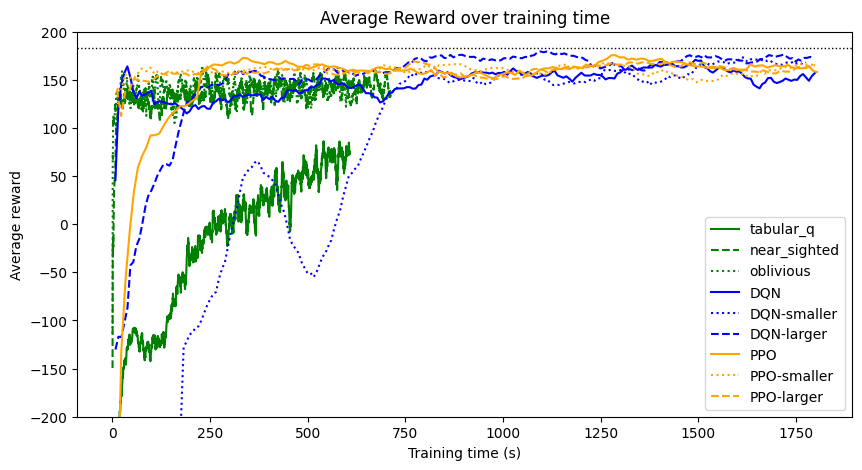

In [85]:
plot_env(full_results["base"], 'runtime', smoothing=20)
plt.ylim(-200,200)

In [15]:
df_exp.runtime.sum()

1798.2417001068752

KeyError: 'index'